# **Regression Analysis**

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm , solve

## Q1.1: Linear Regression on par_off.csv

In [3]:
# Load the dataset
data = np.genfromtxt("../data/par_off.csv", delimiter=",")

# Separate parent and offspring heights
parent_heights = data[:, 0].reshape(-1, 1)
offspring_heights = data[:, 1]

# Calculate mean heights
mean_parent_height = np.mean(parent_heights)
mean_offspring_height = np.mean(offspring_heights)

print(f"Mean Parent Height: {mean_parent_height:.2f} inches")
print(f"Mean Offspring Height: {mean_offspring_height:.2f} inches")

Mean Parent Height: 67.69 inches
Mean Offspring Height: 68.68 inches


In [4]:
# Perform linear regression
reg = LinearRegression()
reg.fit(parent_heights, offspring_heights)

# Get intercept and coefficient
intercept = reg.intercept_
coefficient = reg.coef_[0]

print(f"Regression Intercept: {intercept:.2f}")
print(f"Regression Coefficient (Slope): {coefficient:.2f}")

Regression Intercept: 33.89
Regression Coefficient (Slope): 0.51


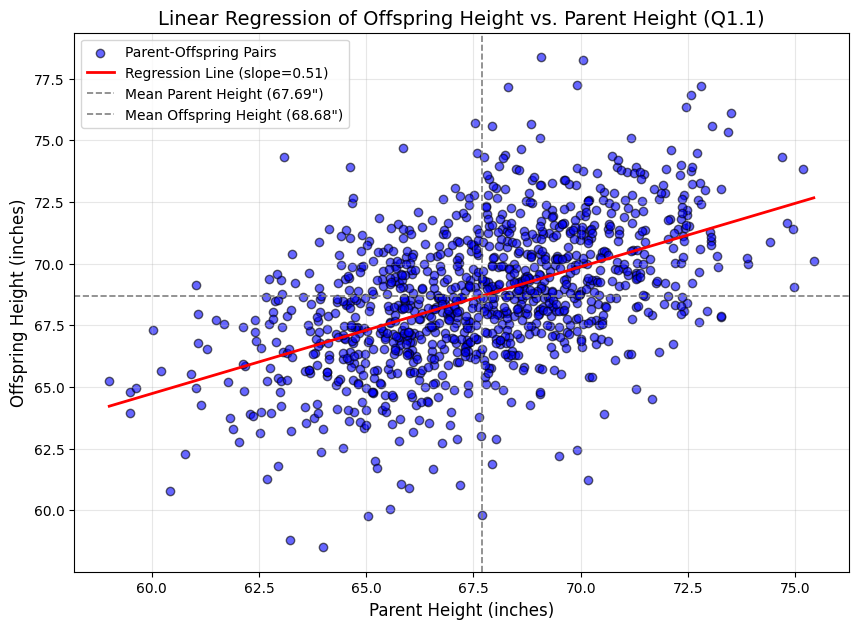

In [5]:
# Generate predictions for the regression line
parent_heights_for_plot = np.array([parent_heights.min(), parent_heights.max()]).reshape(-1, 1)
offspring_predictions = reg.predict(parent_heights_for_plot)

# Plot: Parent-Offspring Heights with Regression Line
plt.figure(figsize=(10, 7))

# Data points
plt.scatter(parent_heights, offspring_heights, alpha=0.6, 
            color="blue", edgecolor="k", label='Parent-Offspring Pairs')

# Regression line
plt.plot(parent_heights_for_plot, offspring_predictions, 
         color='red', linewidth=2, 
         label=f'Regression Line (slope={coefficient:.2f})')

# Mean lines
plt.axvline(mean_parent_height, color='gray', linestyle='--', linewidth=1.2, 
            label=f'Mean Parent Height ({mean_parent_height:.2f}")')
plt.axhline(mean_offspring_height, color='gray', linestyle='--', linewidth=1.2, 
            label=f'Mean Offspring Height ({mean_offspring_height:.2f}")')

# Titles & labels
plt.title('Linear Regression of Offspring Height vs. Parent Height (Q1.1)', fontsize=14)
plt.xlabel('Parent Height (inches)', fontsize=12)
plt.ylabel('Offspring Height (inches)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()


### Q1.1 Observation

These results conform to **Galton and Pearson's observations on "regression to the mean."**  
The regression coefficient of **0.51** (less than 1) indicates that for each 1-inch increase in parent height, the offspring's height increases by only about **0.5 inches**, on average.  

This means that very tall (or very short) parents tend to have children whose heights are **closer to the population mean** than their own. The positive slope shows a clear correlation between parent and offspring heights, but the slope being less than 1 confirms that the offspring deviate **less extremely** from the mean than their parents.  

This is exactly the effect Galton described as *regression to the mean*.


## Question 1.2 

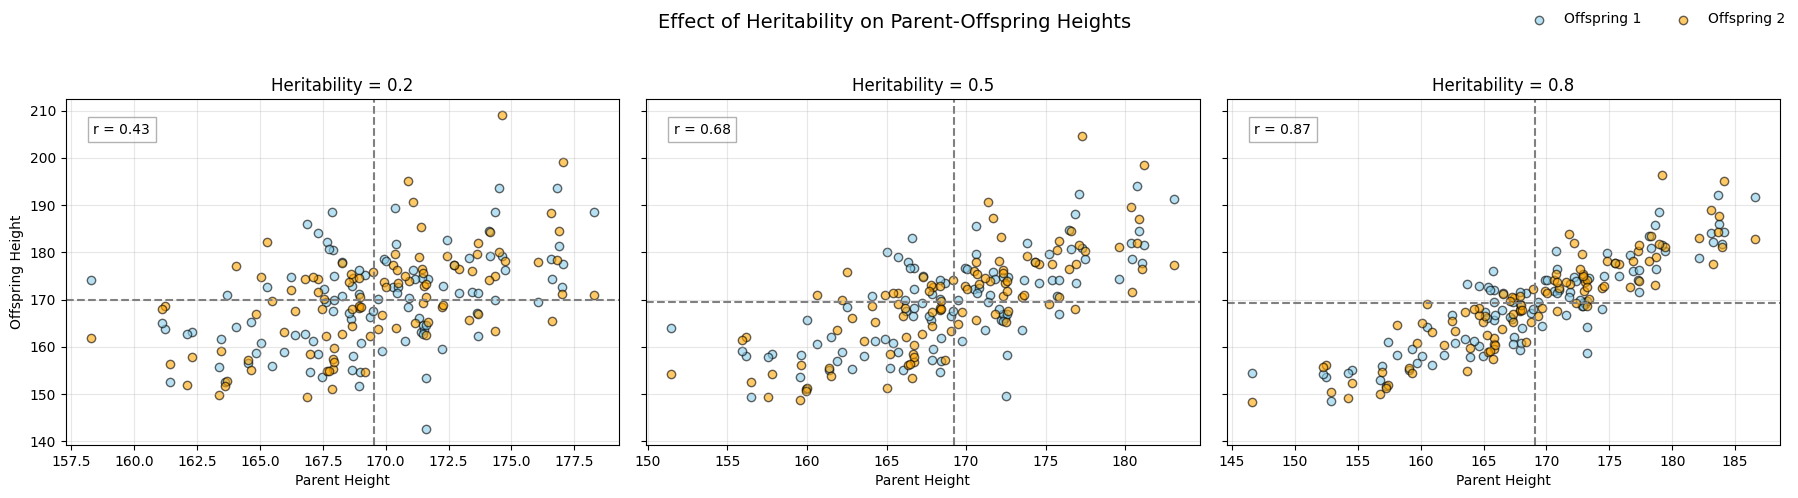

In [6]:
# Defined function to generate synthetic data for heritability experiments
def generate_data(mean, var, hrd, n_each, n=100, seed=None):
    """
    Generate synthetic parent and offspring height data.
    
    Args:
        mean (float): Mean height.
        var (float): Variance of heights.
        hrd (float): Heritability (0 to 1).
        n_each (int): Number of offspring per parent.
        n (int): Number of parents (default 100).
        seed (int, optional): Random seed for reproducibility.
        
    Returns:
        g (ndarray): Parent heights (n, 1).
        x (ndarray): Offspring heights (n, n_each).
    """
    if seed is not None:
        np.random.seed(seed)
        
    # Parent heights
    g = mean + np.sqrt(hrd * var) * np.random.randn(n, 1)
    
    # Offspring heights
    gs = np.tile(g, (1, n_each))
    x = mean + (gs - mean) + np.sqrt((1 - hrd) * var) * np.random.randn(n, n_each)
    return g, x


# Define the experiment function with heritability
def experiment_with_heritability(generate_data_func, mean=170, var=100, 
                                 n_each=2, n=100, seed=None):
    """
    Run experiments for multiple heritability values and plot results.
    """
    heritabilities = [0.2, 0.5, 0.8]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    
    colors = ["skyblue", "orange", "green", "red"]  # extend if n_each > 2
    
    for i, hrd in enumerate(heritabilities):
        g, x = generate_data_func(mean, var, hrd, n_each, n=n, seed=seed)
        
        # Scatter offspring vs parent
        for j in range(n_each):
            axes[i].scatter(g, x[:, j], alpha=0.6, color=colors[j % len(colors)], 
                            edgecolor="k", label=f'Offspring {j+1}')
        
        # Add correlation (using first offspring)
        corr = np.corrcoef(g.flatten(), x[:, 0])[0, 1]
        axes[i].text(0.05, 0.9, f"r = {corr:.2f}", transform=axes[i].transAxes,
                     fontsize=10, bbox=dict(facecolor="white", alpha=0.6, edgecolor="gray"))
        
        # Mean lines
        axes[i].axvline(np.mean(g), color='gray', linestyle='--')
        axes[i].axhline(np.mean(x), color='gray', linestyle='--')
        
        # Titles/labels
        axes[i].set_title(f"Heritability = {hrd}", fontsize=12)
        axes[i].set_xlabel("Parent Height")
        if i == 0:
            axes[i].set_ylabel("Offspring Height")
        axes[i].grid(alpha=0.3)
    
    # Combine legend outside loop (only once)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", ncol=n_each, frameon=False)
    
    plt.suptitle("Effect of Heritability on Parent-Offspring Heights", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Run experiment
experiment_with_heritability(generate_data, seed=42)


### Q1.2 Observation

The function `generate_data()` models heritability by splitting variance into:
- **Genetic component** (`g`): shared across all offspring of a parent, variance = `hrd * var`.
- **Environmental component**: independent for each offspring, variance = `(1 - hrd) * var`.

This reflects Galton & Pearson’s view: offspring resemble parents due to shared genetics but also differ due to random environmental effects.

**Limitation:** The function assumes the same mean for parents and offspring.  

**Improvement:**  
- Add `parent_mean` and `offspring_mean` to simulate generational shifts (e.g., children taller than parents).  
- Optionally allow different variances (`parent_var`, `offspring_var`) or extend to two-parent models for realism.


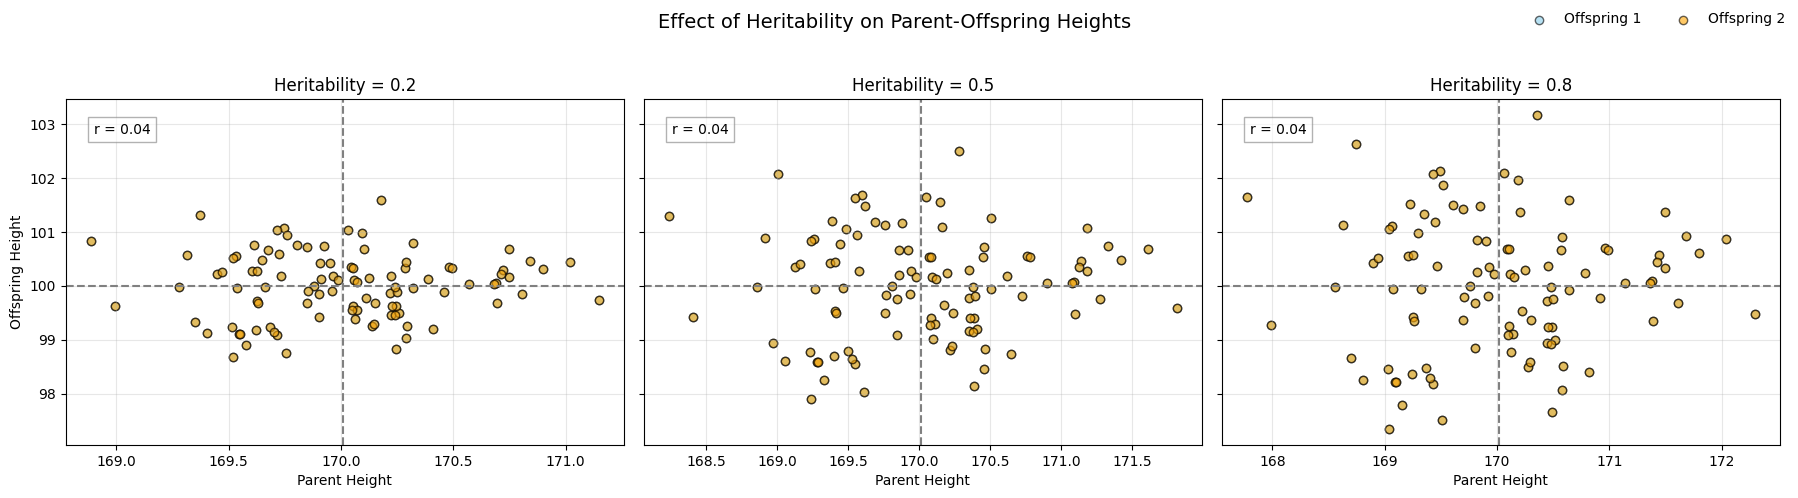

In [7]:
# Generate synthetic data for heritability experiments with a different approach
def generate_data_v2(parent_mean=170, offspring_mean=170, var=25, hrd=0.5, n=100, n_offspring=2, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # input validation
    assert var >= 0, "Variance must be non-negative"
        
    g = np.random.normal(parent_mean, np.sqrt(var), size=n)
    genetic = np.random.normal(0, np.sqrt(hrd * var), size=n)
    
    x = np.zeros((n, n_offspring))
    for j in range(n_offspring):
        env = np.random.normal(0, np.sqrt(max((1 - hrd) * var, 0)), size=n)
        x[:, j] = (genetic + env) - np.mean(genetic + env) + offspring_mean
    return g, x

# Run experiment with the new data generation function
experiment_with_heritability(generate_data_v2, seed=16)


### Q1.3 — Observation  

With variance kept low (`var = 25`), the plots show a scattered cluster of points.  
- **Low heritability (0.2):** values are pulled closer to the mean, little sign of a genetic pattern.  
- **Moderate (0.5):** the cluster spreads out slightly, but still looks mostly random.  
- **High (0.8):** the cluster becomes tighter and more centroid-like, yet not a clear regression line.  

Overall, with low variance the offspring points don’t show the expected parent–offspring trend. They stay clustered, likely due to environmental effects.  

### Suggested Improvement  

To better capture genetic patterns, we could:  
1. **Increase variance** to reduce the “pull” toward the mean.  
2. Add **richer environmental modeling**, since equal noise across all individuals oversimplifies reality.  


## Question 1.4

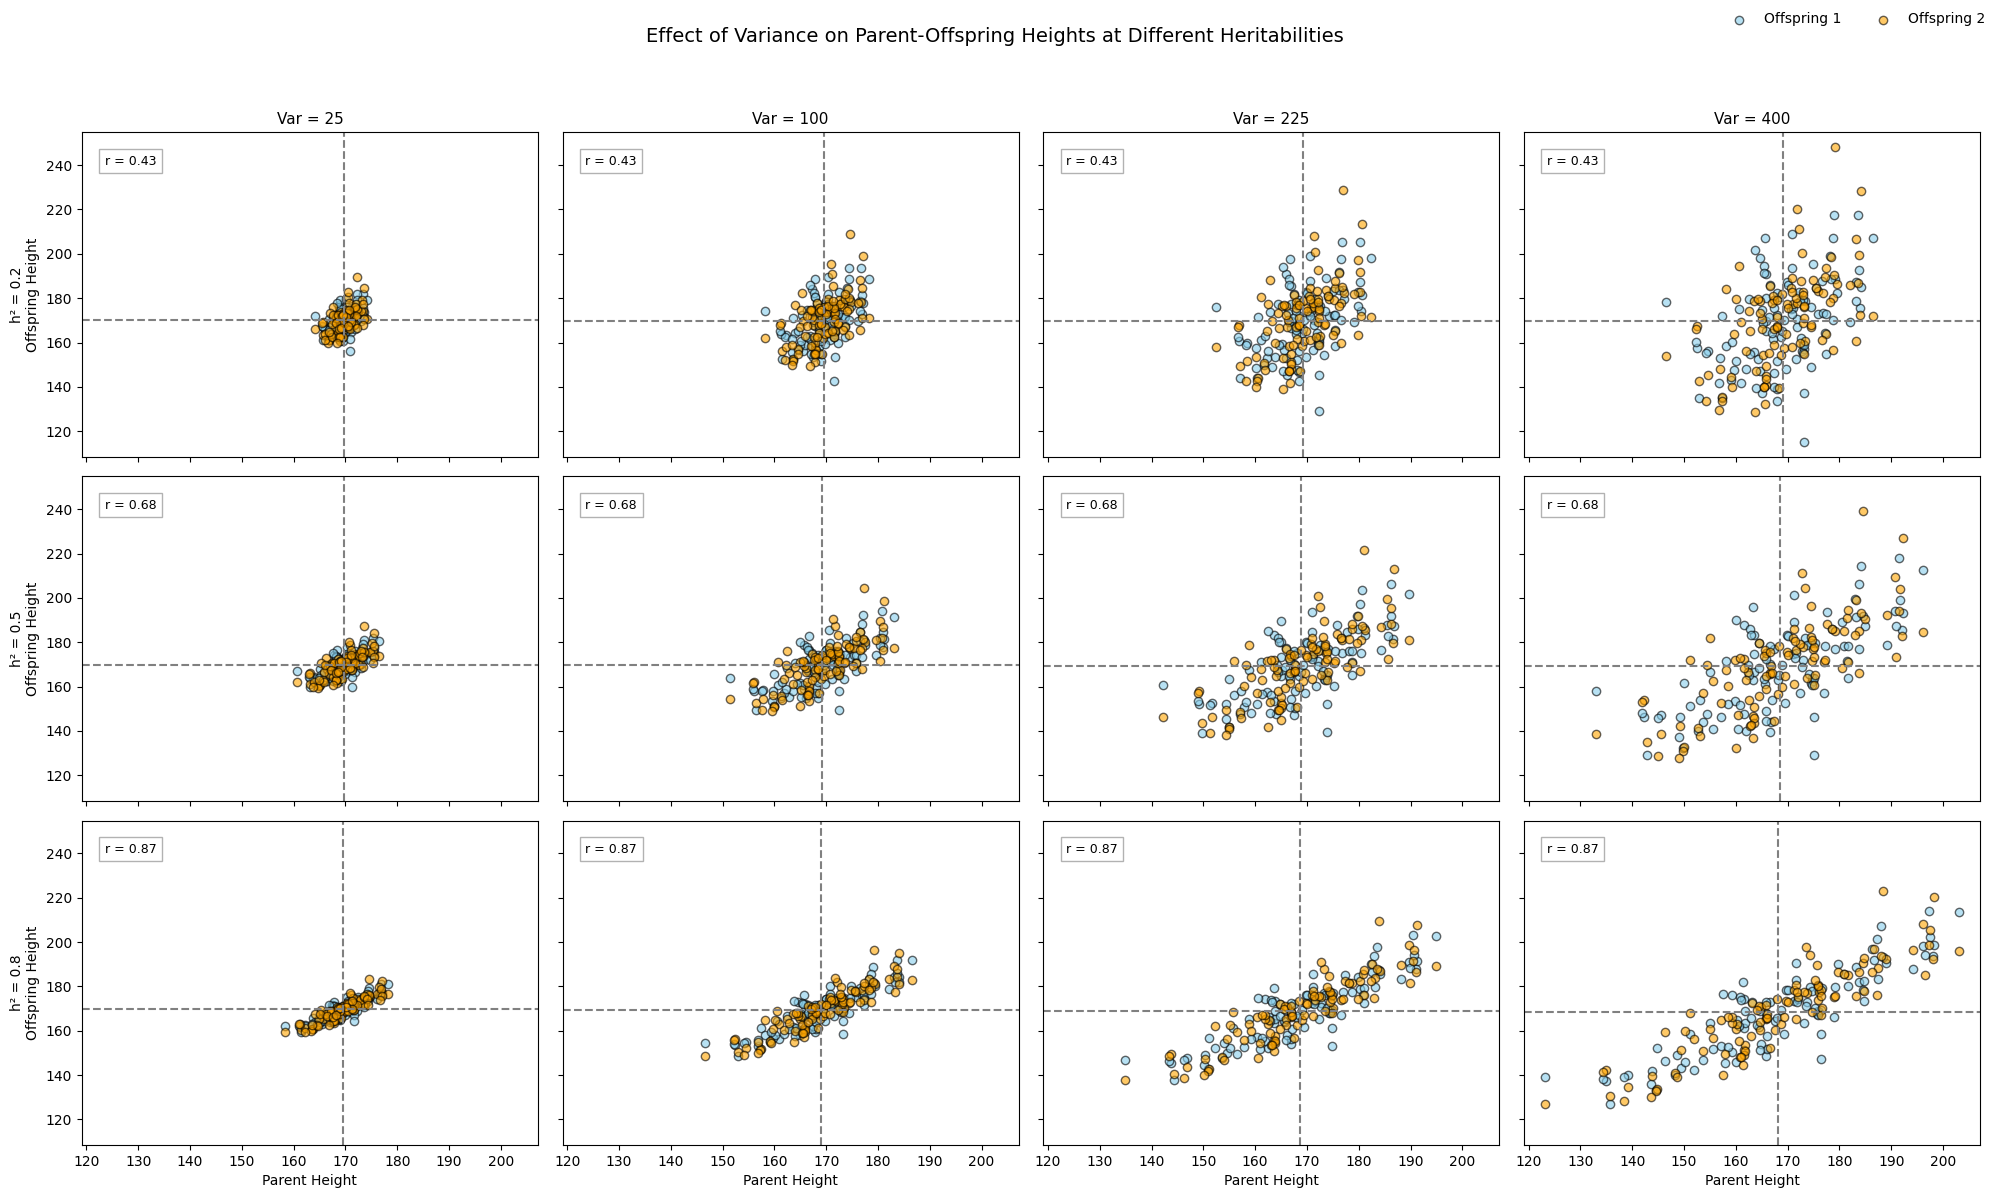

In [9]:
# Experiment varying variance for fixed heritabilities
def experiment_varying_variance(generate_data_func, mean=170, 
                                variances=[25, 100, 225, 400],
                                heritabilities=[0.2, 0.5, 0.8],
                                n_each=2, n=100, seed=None):
    
    fig, axes = plt.subplots(len(heritabilities), len(variances), 
                             figsize=(20, 12), sharey=True, sharex=True)
    
    colors = ["skyblue", "orange"]
    
    for i, hrd in enumerate(heritabilities):
        for j, var in enumerate(variances):
            g, x = generate_data_func(mean, var, hrd, n_each, n=n, seed=seed)
            
            ax = axes[i, j]
            for k in range(n_each):
                ax.scatter(g, x[:, k], alpha=0.6, color=colors[k % len(colors)],
                           edgecolor="k", label=f'Offspring {k+1}')
            
            # Correlation using first offspring
            corr = np.corrcoef(g.flatten(), x[:, 0])[0, 1]
            ax.text(0.05, 0.9, f"r = {corr:.2f}", transform=ax.transAxes,
                    fontsize=9, bbox=dict(facecolor="white", alpha=0.6, edgecolor="gray"))
            
            # Mean lines
            ax.axvline(np.mean(g), color='gray', linestyle='--')
            ax.axhline(np.mean(x), color='gray', linestyle='--')
            
            # Titles
            if i == 0:
                ax.set_title(f"Var = {var}", fontsize=11)
            if j == 0:
                ax.set_ylabel(f"h² = {hrd}\nOffspring Height")
            if i == len(heritabilities) - 1:
                ax.set_xlabel("Parent Height")
    
    # Legend
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", ncol=n_each, frameon=False)
    
    plt.suptitle("Effect of Variance on Parent-Offspring Heights at Different Heritabilities", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Run experiment
experiment_varying_variance(generate_data, seed=42)


### Q1.4 — Heritability, Variance Explained, and the Role of Parent Heights vs. Genetic Information

- **Heritability & variance:**  
  Heritability is how much of the differences we see come from genes.  
  - With **low variance**, everyone clusters near the mean, so parent height doesn’t explain much.  
  - With **higher variance and higher h²**, the scatter lines up more along a diagonal → parents explain more.

- **Knowing genetic make-up (g):**  
  If g is known, we can explain exactly the genetic share of variation (e.g. h² = 0.6 → genes explain 60%).  

- **Do we still need parent height?**  
  - For genetics only: no.  
  - For prediction: yes, since parents also reflect shared environment.

**Summary:**  
Low h² → cloud around the mean.  
High h² → clear line.  
Genes explain the genetic slice; parents add environmental info.


## Q2.2: Generate data and compare unregularized and regularized regression

In [10]:
# Define a function to generate polynomial data
def generate_data_poly(p, beta , sig, n):
   """  Generate polynomial data based on the given parameters.
   Args:
       p (int): Degree of the polynomial.
       beta (array): Coefficients of the polynomial.
       sig (float): Standard deviation of the noise.
       n (int): Number of samples to generate.
   Returns:
       u (array): Input values.
       y (array): Output values with noise.
   """
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
   return u, y

# Define a function to create the model matrix for polynomial regression
def model_matrix(p, u):
    """ Create the model matrix for polynomial regression.
    Args:
        p (int): Degree of the polynomial. Non-negative integer.
        u (array): Input values.
    Returns:
        X (array): Model matrix with polynomial features.
    """
    X = np.ones((u.shape[0], 1))
    p_range = np.arange(0, p + 1)    
    for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
    return X

# Define a function to perform ridge regression training             
def ridge_train(X, y, ngamma):
    """ Perform ridge regression training.
    Args:
        X (array): Model matrix.
        y (array): Output values.
        ngamma (float): Regularization parameter.
    Returns:
        betahat (array): Estimated coefficients.
    """
    # Regularization term
    RegM = ngamma * np.identity(X.shape[1])
    betahat = solve(X.T @ X + RegM, X.T @ y)
    return betahat

# Define a function to test the coefficients
def test_coefficients(n_samples, betahat, X, y):
    """ Test the coefficients by calculating the loss.
    Args:
        n_samples (int): Number of samples.
        betahat (array): Estimated coefficients.
        X (array): Model matrix.
        y (array): Output values.
    Returns:
        loss (float): Loss value.
    """
    # Calculate the loss
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n_samples)
    return loss

### Question 2.1  

The code extends polynomial regression by adding ridge regression. The new part is the penalty term (gamma) that controls how large the coefficients can get.  

If gamma = 0, the penalty is gone and it’s just standard polynomial regression. If gamma > 0, then it becomes ridge regression, which helps keep the model simpler and more stable.  


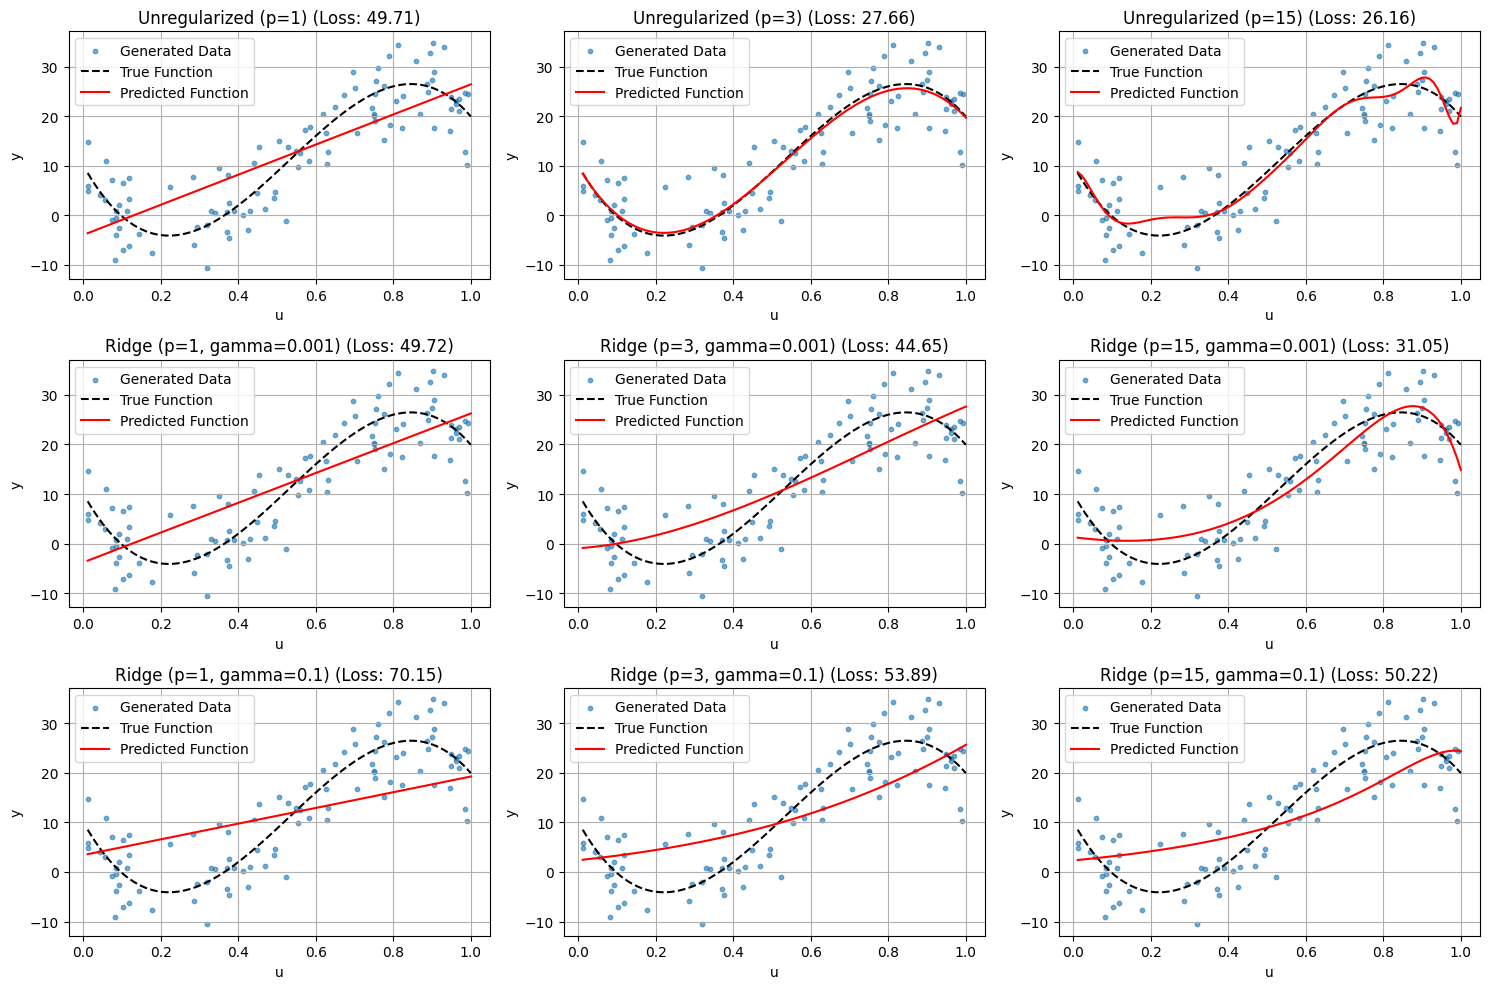

In [11]:
# Parameters for data generation
beta_true = np.array([[10, -140, 400, -250]]).T # True coefficients for a degree 3 polynomial
n_samples = 100
sig_noise = 5
p_true = 3 # True degree of the polynomial

# Generate data
u_data, y_data = generate_data_poly(p_true, beta_true, sig_noise, n_samples)

# Polynomial degrees to test
polynomial_degrees = [1, 3, 15]

# Regularization parameters (gamma values)
gamma_values = [0, 0.001, 0.1] # 0 for unregularized, small, and larger regularization
# Prepare for plotting
plt.figure(figsize=(15, 10))
xx = np.arange(np.min(u_data), np.max(u_data) + 0.01, 0.01).reshape(-1, 1) # x-values for plotting smooth curves
yy_true = (xx ** np.arange(0, p_true + 1)) @ beta_true # True underlying function

plot_idx = 1
for gamma in gamma_values:
    for p in polynomial_degrees:
        plt.subplot(len(gamma_values), len(polynomial_degrees), plot_idx)
        plt.scatter(u_data, y_data, s=10, label='Generated Data', alpha=0.6)
        plt.plot(xx, yy_true, color='black', linestyle='--', label='True Function')

        X_train = model_matrix(p, u_data)
        
        # Ensure n_samples is passed to test_coefficients
        current_n_samples = u_data.shape[0]

        if gamma == 0:
            # Unregularized regression (OLS)
            # Check for singularity before solving
            if np.linalg.cond(X_train.T @ X_train) < 1/np.finfo(X_train.dtype).eps:
                betahat = solve(X_train.T @ X_train, X_train.T @ y_data)
            else:
                # Fallback for singular matrix, e.g., use pseudo-inverse or add tiny regularization
                betahat = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_data
            title_str = f'Unregularized (p={p})'
        else:
            # Regularized regression (Ridge)
            betahat = ridge_train(X_train, y_data, current_n_samples * gamma) # ngamma = n * lambda
            title_str = f'Ridge (p={p}, gamma={gamma})'

        # Calculate predicted y values for plotting
        X_plot = model_matrix(p, xx)
        yy_pred = X_plot @ betahat
        plt.plot(xx, yy_pred, color='red', label='Predicted Function')

        # Calculate and display training loss
        train_loss = test_coefficients(current_n_samples, betahat, X_train, y_data)
        plt.title(f'{title_str} (Loss: {train_loss:.2f})')
        plt.xlabel('u')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plot_idx += 1

plt.tight_layout()
plt.show()

### Question 2.2 Observation

The data was generated by a cubic (p=3), so that’s the natural fit without regularisation.

* **Unregularised**

  * **p=1** → underfits (line too simple).
  * **p=3** → matches the shape well (true generating function).
  * **p=15** → too much flexibility; starts following noise (overfitting).

* **Ridge (γ = 0.001)**

  * Light penalty smooths the high-degree model.
  * **p=15** becomes more stable, closer to the true curve. Training loss rises slightly, but generalisation improves.

* **Ridge (γ = 0.1)**

  * Strong penalty suppresses complexity too much. Fits become flat and underfit.

**Suggestion:**

* Without regularisation → best to use degree close to the true function (here \~3).
* With ridge → a higher basis (e.g., p=15) is workable since γ controls complexity.
* Always tune **p** and **γ** with cross-validation, since the balance depends on noise and sample size.


## Q2.3: Compare out-of-distribution predictions and outlier effects

In [12]:
# Parameters for data generation (same as Q2.2)
beta_true = np.array([[10, -140, 400, -250]]).T # True coefficients for a degree 3 polynomial
n_samples = 100
sig_noise = 5
p_true = 3 # True degree of the polynomial

# Generate base data
u_base, y_base = generate_data_poly(p_true, beta_true, sig_noise, n_samples)

## Scenario 1: Out-of-distribution predictions

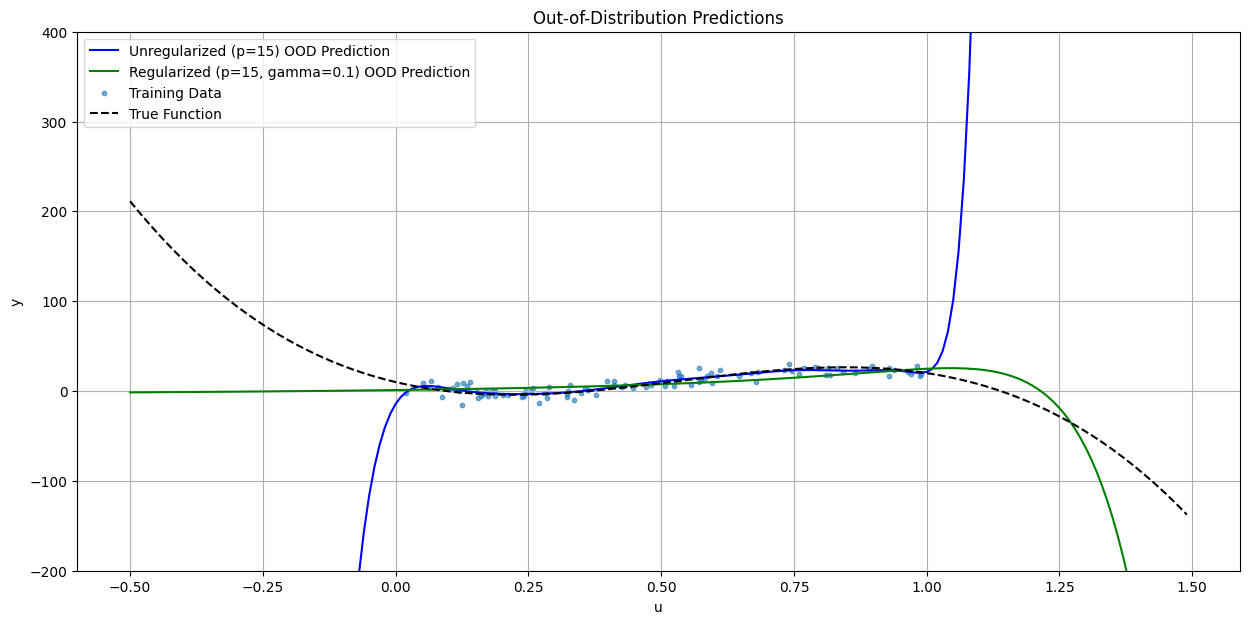

In [17]:
# Generate test data outside the [0, 1] interval
u_ood = np.arange(-0.5, 1.5, 0.01).reshape(-1, 1) # Extended range
y_ood_true = (u_ood ** np.arange(0, p_true + 1)) @ beta_true

plt.figure(figsize=(15, 7))

# Unregularized (p=15) for OOD
p_ood = 15
X_train_ood = model_matrix(p_ood, u_base)
# Check for singularity before solving
if np.linalg.cond(X_train_ood.T @ X_train_ood) < 1/np.finfo(X_train_ood.dtype).eps:
    betahat_unreg_ood = solve(X_train_ood.T @ X_train_ood, X_train_ood.T @ y_base)
else:
    # Fallback for singular matrix, e.g., use pseudo-inverse or add tiny regularization
    betahat_unreg_ood = np.linalg.pinv(X_train_ood.T @ X_train_ood) @ X_train_ood.T @ y_base

X_ood_plot_unreg = model_matrix(p_ood, u_ood)
yy_pred_unreg_ood = X_ood_plot_unreg @ betahat_unreg_ood

plt.plot(u_ood, yy_pred_unreg_ood, color='blue', label=f'Unregularized (p={p_ood}) OOD Prediction')

# Regularized (p=15, gamma=0.1) for OOD
gamma_ood = 0.1
betahat_reg_ood = ridge_train(X_train_ood, y_base, n_samples * gamma_ood)
X_ood_plot_reg = model_matrix(p_ood, u_ood)
yy_pred_reg_ood = X_ood_plot_reg @ betahat_reg_ood

plt.plot(u_ood, yy_pred_reg_ood, color='green', label=f'Regularized (p={p_ood}, gamma={gamma_ood}) OOD Prediction')

plt.scatter(u_base, y_base, s=10, label='Training Data', alpha=0.6)
plt.plot(u_ood, y_ood_true, color='black', linestyle='--', label='True Function')

plt.title('Out-of-Distribution Predictions')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-200, 400) # Adjust y-limit for better visualization of OOD behavior
plt.show()

## Scenario 2: Outlier effects

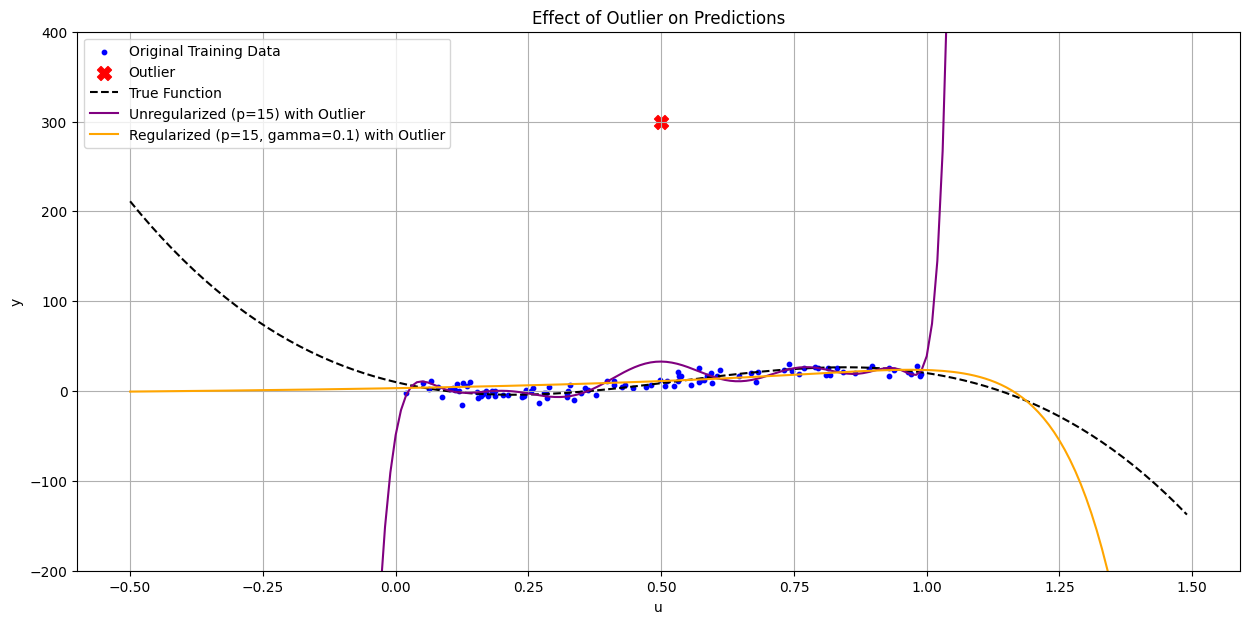

In [18]:
# Add a single outlier to the training data
u_outlier = np.copy(u_base)
y_outlier = np.copy(y_base)

# Add a significant outlier
outlier_index = 50 # Choose an arbitrary index
u_outlier[outlier_index] = 0.5 # Keep u within original range
y_outlier[outlier_index] = 300 # A very high outlier value

plt.figure(figsize=(15, 7))
plt.scatter(u_base, y_base, label='Original Training Data', s=10, color='blue')
plt.scatter(u_outlier[outlier_index], y_outlier[outlier_index], color='red', marker='X', s=100, label='Outlier')

# Plot true function
plt.plot(u_ood, y_ood_true, color='black', linestyle='--', label='True Function')

# Unregularized (p=15) with outlier
X_train_outlier_unreg = model_matrix(p_ood, u_outlier)
if np.linalg.cond(X_train_outlier_unreg.T @ X_train_outlier_unreg) < 1/np.finfo(X_train_outlier_unreg.dtype).eps:
    betahat_unreg_outlier = solve(X_train_outlier_unreg.T @ X_train_outlier_unreg, X_train_outlier_unreg.T @ y_outlier)
else:
    betahat_unreg_outlier = np.linalg.pinv(X_train_outlier_unreg.T @ X_train_outlier_unreg) @ X_train_outlier_unreg.T @ y_outlier

X_outlier_plot_unreg = model_matrix(p_ood, u_ood)
yy_pred_unreg_outlier = X_outlier_plot_unreg @ betahat_unreg_outlier
plt.plot(u_ood, yy_pred_unreg_outlier, color='purple', label=f'Unregularized (p={p_ood}) with Outlier')

# Regularized (p=15, gamma=0.001) with outlier
betahat_reg_outlier = ridge_train(X_train_outlier_unreg, y_outlier, n_samples * gamma_ood)
X_outlier_plot_reg = model_matrix(p_ood, u_ood)
yy_pred_reg_outlier = X_outlier_plot_reg @ betahat_reg_outlier
plt.plot(u_ood, yy_pred_reg_outlier, color='orange', label=f'Regularized (p={p_ood}, gamma={gamma_ood}) with Outlier')

plt.title('Effect of Outlier on Predictions')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-200, 400) # Adjust y-limit for better visualization
plt.show()

### Question 2.3: Out-of-Distribution Predictions and Effect of Outliers

#### 1. Out-of-Distribution Predictions
* **Unregularised (p=15)**
  * Fits inside `[0,1]`, but outside the interval it blows up quickly to large values.
  * Classic high-degree issue: interpolates well on training range, unstable beyond.

* **Ridge (p=15, γ=0.1)**
  * Predictions stay bounded outside `[0,1]`.
  * Still deviates from the truth, but no wild swings.
  * Penalty keeps coefficients in check, making extrapolation smoother.

**Observation:** Regularisation keeps the model slightly more stable beyond the training data, unlike the unregularised case.

#### 2. Effect of a Single Outlier
* **Unregularised (p=15, with outlier)**
  * The curve bends slightly toward the outlier.
  * The change isn’t huge, but given the scale it shows how sensitive the fit is.

* **Ridge (p=15, γ=0.1, with outlier)**
  * Shape is almost unchanged compared to no outlier.
  * Left side flattens, right side dips a bit, but nowhere near as bad as unregularised.

**Observation:** Regularisation limits the outlier’s effect. The unregularised model still “notices” the point (small bend), while ridge smooths it out and keeps the curve more stable.

#### 3. Key Takeaways
1. Unregularised (p=15) → unstable outside [0,1] and easily pulled by outliers.
2. Ridge (γ=0.1) → keeps things bounded and less sensitive to noise, but predictions beyond the training range are still not that good.
3. Trade-off → ridge adds bias, but avoids the extreme behaviour
